# KNN
 First we need to import the relevant libraries, namely the dataset, Python's numpy, a graphing library, and the machine learning library scikit-learn

In [2]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import neighbors, preprocessing
from sklearn.model_selection import GridSearchCV

In [3]:
np.random.seed(1)

# Regression
The Boston dataset was originally devised for regression, so we'll first show a simple regression model in scikit-learn

### Basic single model:
Let's load the data and split into training and testing portions

In [4]:
boston = load_boston()

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
boston.DESCR.split('\n')

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

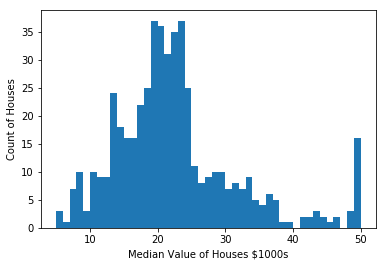

In [43]:
plt.hist(boston.target, bins=45)
plt.xlabel('Median Value of Houses $1000s')
plt.ylabel('Count of Houses')
plt.show()

In [8]:
X, y = shuffle(boston.data, boston.target, random_state=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [10]:
X_test

array([[   2.63548,    0.     ,    9.9    , ...,   18.4    ,  350.45   ,
          12.64   ],
       [   9.18702,    0.     ,   18.1    , ...,   20.2    ,  396.9    ,
          23.6    ],
       [  13.3598 ,    0.     ,   18.1    , ...,   20.2    ,  396.9    ,
          16.35   ],
       ..., 
       [   0.5405 ,   20.     ,    3.97   , ...,   13.     ,  390.3    ,
           3.16   ],
       [   0.76162,   20.     ,    3.97   , ...,   13.     ,  392.4    ,
          10.45   ],
       [   0.67191,    0.     ,    8.14   , ...,   21.     ,  376.88   ,
          14.81   ]])

In [11]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_test

array([[-0.11747736, -0.46822579, -0.21029151, ..., -0.07173937,
        -0.06607884, -0.04750103],
       [ 0.62084318, -0.46822579,  1.00035377, ...,  0.78771486,
         0.44211869,  1.47848722],
       [ 1.09109127, -0.46822579,  1.00035377, ...,  0.78771486,
         0.44211869,  0.46905156],
       ..., 
       [-0.35356944,  0.44252634, -1.08579474, ..., -2.65010207,
         0.36990979, -1.36742517],
       [-0.3286505 ,  0.44252634, -1.08579474, ..., -2.65010207,
         0.39288535, -0.35242022],
       [-0.3387603 , -0.46822579, -0.47013733, ...,  1.16969452,
         0.22308501,  0.25463351]])

In [13]:
X_test[0]

array([-0.11747736, -0.46822579, -0.21029151, -0.27288841, -0.10988619,
       -1.89052546, -1.14330694, -0.58949122, -0.63415704, -0.61233513,
       -0.07173937, -0.06607884, -0.04750103])

#### We'll keep with how we determined k in R, by taking the square root of the number of observations

In [14]:
k = int(len(X_train) ** (1/2))
print("k: " + str(k))

k: 20


#### We now define the parameters for the model, and given them to the model object, fit the model to the data, and calculate the MSE on the testing data

In [15]:
params = {'n_neighbors': k, 'weights': "uniform"}

kkn_r = neighbors.KNeighborsRegressor(**params)

kkn_r.fit(X_train, y_train)
mse = mean_squared_error(y_test, kkn_r.predict(X_test))
print("MSE: %.2f" % mse)
print(kkn_r.score(X_test, y_test))

MSE: 24.98
0.736265561435


In [37]:
kkn_r.score?

# Grid search:
A more thorough analysis allows for checking multiple values for any parameter, let's look for the best model by looking at a range of values for k

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, int(k+(k/2)), 1),
              'weights': ["uniform", "distance"]}

knn_r = GridSearchCV(neighbors.KNeighborsRegressor(), param_grid)
knn_r.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
GridSearchCV?

In [19]:
np.arange(1, int(k+(k/2)),1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

#### The cross-validated results come in the form of a dictionary with the following keys

In [20]:
sorted(knn_r.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [21]:
knn_r.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [22]:
knn_r.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

#### If we want to know explicitly which parameter combinations were computed, we can check the params key

In [23]:
knn_r.cv_results_["params"]

[{'n_neighbors': 1, 'weights': 'uniform'},
 {'n_neighbors': 1, 'weights': 'distance'},
 {'n_neighbors': 2, 'weights': 'uniform'},
 {'n_neighbors': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'weights': 'uniform'},
 {'n_neighbors': 3, 'weights': 'distance'},
 {'n_neighbors': 4, 'weights': 'uniform'},
 {'n_neighbors': 4, 'weights': 'distance'},
 {'n_neighbors': 5, 'weights': 'uniform'},
 {'n_neighbors': 5, 'weights': 'distance'},
 {'n_neighbors': 6, 'weights': 'uniform'},
 {'n_neighbors': 6, 'weights': 'distance'},
 {'n_neighbors': 7, 'weights': 'uniform'},
 {'n_neighbors': 7, 'weights': 'distance'},
 {'n_neighbors': 8, 'weights': 'uniform'},
 {'n_neighbors': 8, 'weights': 'distance'},
 {'n_neighbors': 9, 'weights': 'uniform'},
 {'n_neighbors': 9, 'weights': 'distance'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'n_neighbors': 10, 'weights': 'distance'},
 {'n_neighbors': 11, 'weights': 'uniform'},
 {'n_neighbors': 11, 'weights': 'distance'},
 {'n_neighbors': 12, 'weights': 'unifor

#### The mean_test_score key gives the score for each of the above combinations on the CV

In [24]:
knn_r.cv_results_["mean_test_score"]

array([ 0.65196087,  0.65196087,  0.68616272,  0.70788426,  0.72378716,
        0.75479941,  0.70218773,  0.74137525,  0.71139667,  0.74532754,
        0.71158707,  0.74667568,  0.70462123,  0.74202155,  0.70471201,
        0.73864603,  0.69630483,  0.73255173,  0.6917272 ,  0.72737057,
        0.68728466,  0.72377333,  0.68379587,  0.72158735,  0.67545972,
        0.71550431,  0.66517757,  0.70823355,  0.66014866,  0.70418569,
        0.65604771,  0.70022502,  0.64678475,  0.69265114,  0.64227177,
        0.68867076,  0.637639  ,  0.68481846,  0.63235158,  0.68043671,
        0.62473719,  0.67383375,  0.6193789 ,  0.66944228,  0.61344146,
        0.66430505,  0.60576799,  0.65794801,  0.59871414,  0.65225043,
        0.59372617,  0.64816131,  0.58921686,  0.64458522,  0.58606534,
        0.64094321,  0.5806255 ,  0.63642241])

#### Score on testing data

In [26]:
knn_r.score(X_test, y_test)

0.88741690895044401

# Classification
Following the R demonstration, we can also do classfication, first we'll need to convert the distances to three different groupings

In [28]:
new_boston = {"data": [],
              "target": []}

for i, arr in enumerate(boston["data"]):
    
    new_arr = arr
    
    if arr[7] < 3:
        new_boston["target"].append("short")
    elif arr[7] < 6:
        new_boston["target"].append("medium")
    else:
        new_boston["target"].append("long")
        
    new_arr = np.delete(new_arr, 7)
    new_arr = np.append(new_arr, boston["target"][i])

    new_boston["data"].append(new_arr)
    
new_boston["target"].count("short"), new_boston["target"].count("medium"), new_boston["target"].count("long")

(240, 179, 87)

#### Now we can reassign the new data to training and testing

In [29]:
X, y = shuffle(new_boston["data"], new_boston["target"], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
param_grid = {'n_neighbors': np.arange(1, int(k+(k/2)), 1),
              'weights': ["uniform", "distance"]}

knn_c = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid)
knn_c.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
knn_r.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [36]:
knn_c.score(X_test, y_test)

0.82352941176470584